# Neural Network Classification Problem Fundamentals

Classificaiton problems are used to "classify" inputs into a class as an output. The purpose behind this notebook is to dig into classification problems. There are three different types of classification problems that the below resource goes into:

* https://vitalflux.com/difference-binary-multi-class-multi-label-classification

**Binary Classification**
Binary Classification is where there are only two labels. For instance, is an email considered spam or not spam.

**Multi-class Classificaiton**
Multiclass Classification is where each data sample is assigned one and only one label from more than two classes.

**Multi-label Classificaiton**
Multi-label Classification is a type of supervised machine learning algorithm that can be used to assign zero or more labels to each data sample.

## Topics
This notebook will look at a handful of topics to help better understand how to utilitize TensorFlow in classification problems.

1. Architecture of a neural network classfification model.
2. Input shapes and output shapes of a classification model (features and labels).
3. Creating custom data to view and fit.
4. Steps in modeling.
5. Differeneet classification evaluation methods.
6. Saving and loading models.

## Imports

In [1]:
import itertools

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from py_learning_toolbox import ml_toolbox
from sklearn.datasets import make_circles
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import tensorflow as tf

## Helpers
Utility functions used in this notebook to mitigate copied code.

In [2]:
def plot_decision_boundary(model: tf.keras.models.Model, X: tf.Tensor, y: tf.Tensor):
    """ Plots the decision boundary created by the model predicting X.

        Args:
            model (tf.keras.models.Model): the model to 
    """
    # Grab the x and y limits of graph for the X values (with margin of 0.1)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    
    # Creating prediction data
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Create X value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()]  # stack 2D arrays together
    
    # Make predictions
    y_pred = model.predict(x_in)
    
    # Check for multi-class
    if len(y_pred[0]) > 1:
        # Multiclass classification
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        # Binary classification
        y_pred = np.round(y_pred).reshape(xx.shape)
   
    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

## Creating & Analyzing Datasets

For the purpose of this notebook, I am going to look at a simplified example dataset from sklearn.

* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html

### Creating Dataset

In [3]:
# Dataset Creation Constants
N_SAMPLES = 1000
DATASET_RANDOM_STATE = 42
NOISE = 0.03

In [4]:
# Making a dataset that sets 2 inputs (x and y position of a dot on a graph),
# and 1 output (which circle the data lays on)
X, y = make_circles(N_SAMPLES, noise=NOISE, random_state=DATASET_RANDOM_STATE)
X[:10], y[:10]  # This is a binary classification problem

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

### Analyzing Dataset

In [5]:
circles = pd.DataFrame({'X0': X[:, 0], 'X1': X[:, 1], 'label': y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


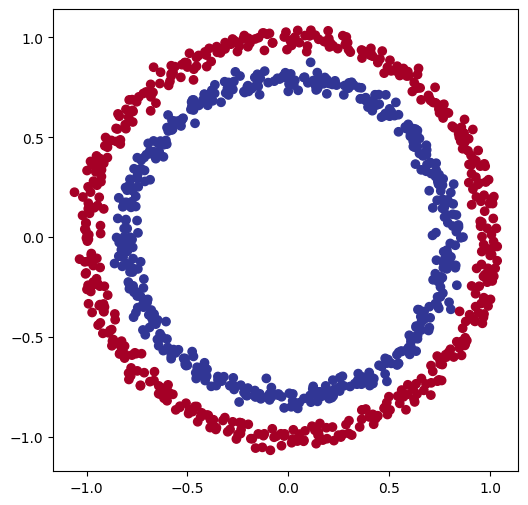

In [6]:
# Plotting the data
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [7]:
# Inspecting the input and output shapes
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# Number of samples
len(X), len(y)

(1000, 1000)

In [9]:
# Look at an example
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [10]:
X.dtype, y.dtype

(dtype('float64'), dtype('int64'))

### Split Datasets

Need to split my complete data set into a training set and a test set

In [11]:
# Constants
TRAIN_SIZE = 0.8

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE)

X_train[:5], y_train[:5], len(X_train), len(X_test)

(array([[-0.08357481, -0.79997071],
        [-0.63317717,  0.82597819],
        [-0.61907795,  0.40222047],
        [-0.8897743 , -0.47972872],
        [ 0.61681531, -0.76094829]]),
 array([1, 0, 1, 0, 0]),
 800,
 200)

## Experiments - Binary Classification

To test out the experiments, I am going to perform a handful of experiments to analyze the circles dataset.

* Experiment-0 (Baseline): Simple Model
* Experiment-1: Two Hidden Layers
* Experiment-2: Non-Linearity
* Experiment-3: Train and Test Sets
* Experiment-4: Learning Rate Analysis
* Experiment-5:
* Experiment-6:
* Experiment-7:

### Global Constants

In [13]:
# Constants
RANDOM_SEED = 42
INPUT_SHAPE = 2
OUTPUT_SHAPE = 1

### Experiment-0 (Baseline): Simple Model with One Hidden Layer

As a first experiment, I am going to start with a very simple model with a single hidden layer.

* Single Hidden Layer - 100 Neurons
* Optimizer - SGD
* Epochs - 100

In [14]:
# Constants
model_0_name = 'model_0_simple'

EPOCHS_0 = 100

In [15]:
# Create Model
model_0 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(INPUT_SHAPE,), name='InputLayer'),
    tf.keras.layers.Dense(100, name='HiddenLayer-1'),
    tf.keras.layers.Dense(OUTPUT_SHAPE, name='OutputLayer'),
], name=model_0_name)

# Compile Model
model_0.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.legacy.SGD(),
                metrics=['accuracy'])

# Fit Model
model_0_history = model_0.fit(X, y, epochs=EPOCHS_0, verbose=0)

2023-09-15 20:43:17.495711: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-09-15 20:43:17.495735: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-09-15 20:43:17.495740: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-09-15 20:43:17.495806: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-09-15 20:43:17.496062: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-09-15 20:43:17.739385: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [16]:
# Evaluating Model
model_0.evaluate(X, y)

27/32 [========================>.....] - ETA: 0s - loss: 0.6958 - accuracy: 0.5289

2023-09-15 20:43:32.578879: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 0s 5ms/step - loss: 0.6983 - accuracy: 0.5190


[0.6983046531677246, 0.5189999938011169]

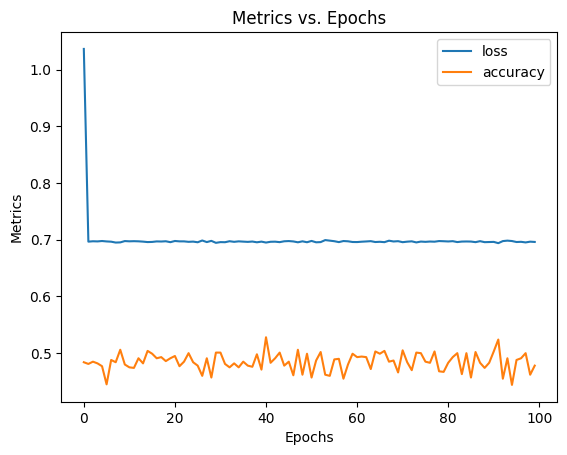

In [17]:
# Aanalyze Data
ml_toolbox.analysis.history.plot_history(model_0_history)

### Experiment-1: Two Hidden Layers

* Two Hidden Layers - 100 Neurons, 10 Neurons
* Optimizer - SGD
* Epochs - 100

#### Improving Model

The model above is hitting an accuracy of 50% which is just terrible!

**NOTE**: the model above doesn't split the dataset into training and test.

In [18]:
# Constants
model_1_name = 'model_1_two_hidden_layers'

EPOCHS_1 = 100

In [19]:
# Create Model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(INPUT_SHAPE,), name='Input'),
    tf.keras.layers.Dense(100, name='Hidden-1'),
    tf.keras.layers.Dense(10, name='Hidden-2'),
    tf.keras.layers.Dense(OUTPUT_SHAPE, name='Output')
], name=model_1_name)

# Compiling Model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=['accuracy'])

# Fitting Model
model_1_history = model_1.fit(X, y, epochs=EPOCHS_1, verbose=0)

2023-09-15 20:43:33.082359: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [20]:
# Evaluate Model
model_1.evaluate(X, y)

26/32 [=======================>......] - ETA: 0s - loss: 0.6974 - accuracy: 0.4880

2023-09-15 20:43:50.651295: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 0s 5ms/step - loss: 0.6959 - accuracy: 0.4980


[0.6958743333816528, 0.49799999594688416]

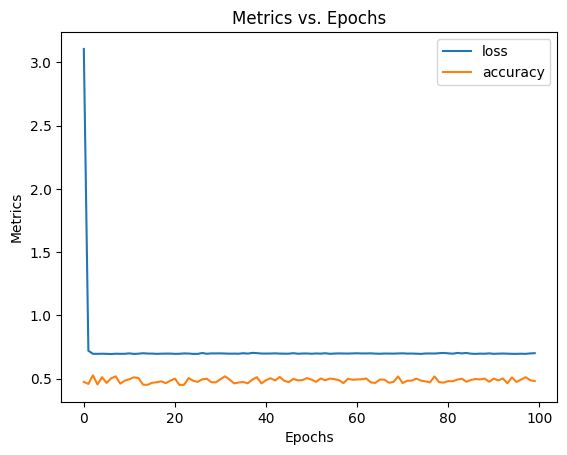

In [21]:
ml_toolbox.analysis.history.plot_history(model_1_history)

104/313 [========>.....................] - ETA: 0s

2023-09-15 20:43:51.004381: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 0s 1ms/step


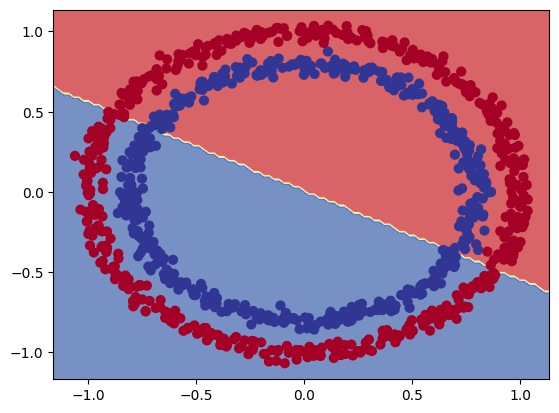

In [22]:
# Viewing the decision boundary of model_1
plot_decision_boundary(model_1, X, y)

#### Findings

Well there's your problem. The model is trying to treat the binary output as a linear function. This is suggesting that there is no non-linearity introduced into the model!

**Non-Linearity**
Non-linearity in Neural Networks is introduced through the activation functions for each hidden layer. Without defining the activation functions, there is no non-linearity introduced into the model, so we cannot generate outputs of anything other than linear plots.

### Experiment-2: Non-linearity w/ Two Hidden Layers

Improving model by introducing non-linearity through activation functions.
* https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/

The model has the following parameters:
* Two Hidden Layers - 5 Neurons, 5 Neurons - Relu
* Optimizer - Adam
* Epochs - 100

In [23]:
# Constants
model_2_name = 'model_2_non_linearity'

EPOCHS_2 = 100

In [24]:
# Create the model (using a classification activation function (sigmoid))
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(INPUT_SHAPE,), name='Input'),
    tf.keras.layers.Dense(5, activation=tf.keras.activations.relu, name='Hidden-1'),
    tf.keras.layers.Dense(5, activation=tf.keras.activations.relu, name='Hidden-2'),
    tf.keras.layers.Dense(OUTPUT_SHAPE, activation=tf.keras.activations.sigmoid, name='Output'),
], name=model_2_name)

# Compiling the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=['accuracy'])

# Fitting the model
model_2_history = model_2.fit(X, y, epochs=EPOCHS_2, verbose=0)

2023-09-15 20:43:51.822370: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [25]:
# Evaluating the model
model_2.evaluate(X, y)

22/32 [===================>..........] - ETA: 0s - loss: 0.6929 - accuracy: 0.4986

2023-09-15 20:44:09.528413: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.4880


[0.693228006362915, 0.4880000054836273]

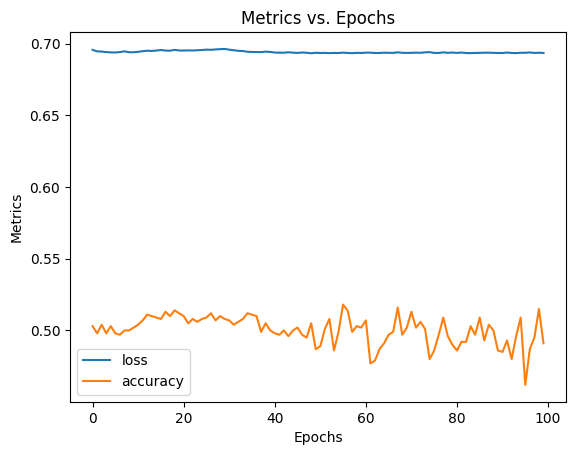

In [26]:
ml_toolbox.analysis.history.plot_history(model_2_history)

 98/313 [========>.....................] - ETA: 0s

2023-09-15 20:44:09.888585: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 0s 1ms/step


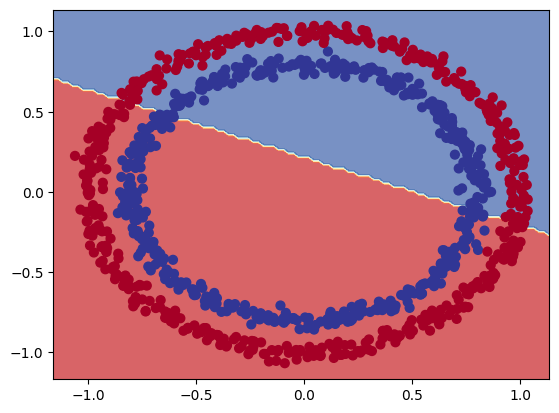

In [27]:
# Viewing the decision boundary of model_3
plot_decision_boundary(model_2, X, y)

### Experiment-3: Introduce Train and Test Set

First step is to do this right and setup a training and test dataset.

The model has the following parameters:

* Two Hidden Layers - 5 Neurons, 5 Neurons - Relu
* Optimizer - Adam, Learning Rate=0.01
* Epochs - 100

In [28]:
# Constants
model_3_name = 'model_3_train_test_set'

EPOCHS_3 = 100
LEARNING_RATE_3 = 0.01

In [29]:
# Create Model
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(INPUT_SHAPE,), name='Input'),
    tf.keras.layers.Dense(5, activation=tf.keras.activations.relu, name='Hidden-1'),
    tf.keras.layers.Dense(5, activation=tf.keras.activations.relu, name='Hidden-2'),
    tf.keras.layers.Dense(OUTPUT_SHAPE, activation=tf.keras.activations.sigmoid, name='Output')
], name=model_3_name)

# Compile Model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=LEARNING_RATE_3),
                metrics=['accuracy'])

# Fit Model
model_3_history = model_3.fit(X_train,
                              y_train,
                              epochs=EPOCHS_3,
                              validation_data=(X_test, y_test),
                              verbose=0)

2023-09-15 20:44:10.623975: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-15 20:44:10.905269: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [30]:
model_3.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.6941 - accuracy: 0.4900


[0.6940863132476807, 0.49000000953674316]

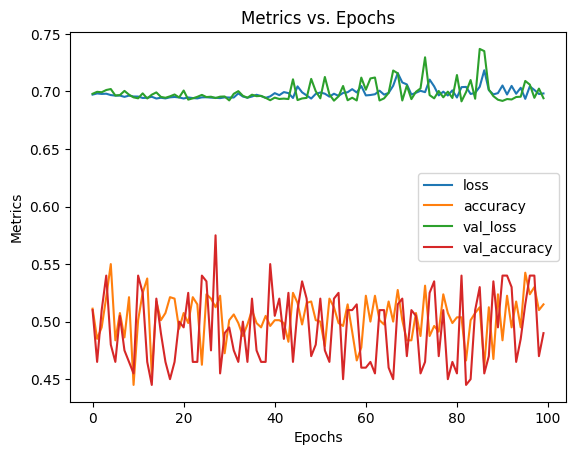

In [31]:
ml_toolbox.analysis.history.plot_history(model_3_history)

In [32]:
model_3_pred_probs = model_3.predict(X_test)
model_3_preds = tf.round(model_3_pred_probs)

model_3_results = ml_toolbox.analysis.classification.generate_prediction_metrics(y_test,
                                                                                 tf.squeeze(model_3_preds),
                                                                                 name=model_3_name)
model_3_results

7/7 [==============================] - 0s 2ms/step


2023-09-15 20:44:25.550296: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


ClassificationPredictionMetrics(accuracy=0.49, precision=0.5177766256850836, recall=0.49, f1=0.44648, name='model_3_train_test_set')

313/313 [==============================] - 0s 1ms/step


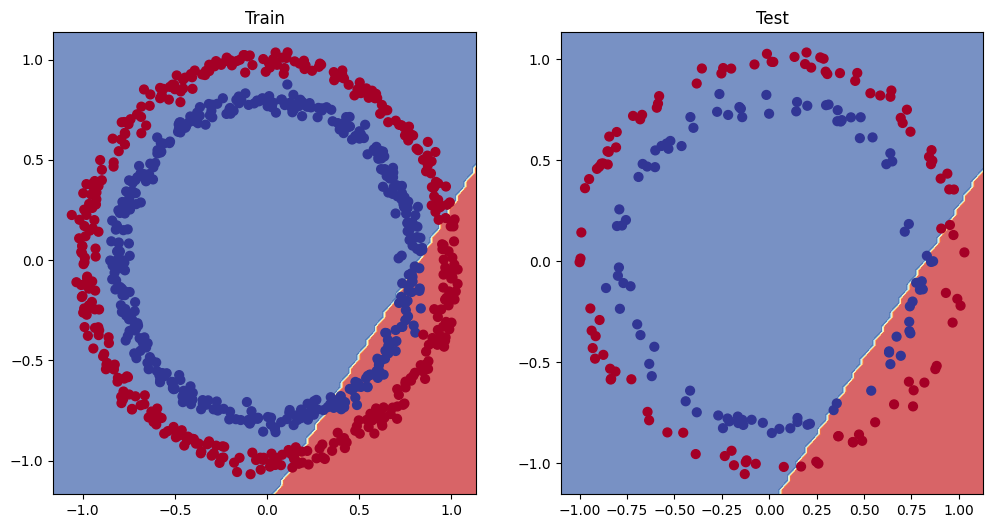

In [33]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_3, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_3, X_test, y_test)

### Experiment-4: Learning Rate Analysis

##### Using Loss Curves to Determine Best Learning Rate

To find the ideal learning rate (the learnig rate where the loss decreeases the most during training) I'm going to use the following steps
1. A learning rate callback: An extra piece of functionality you can add to your *while* its training.
2. Another model (we could use the same one as above, but we're practicing building models here)
3. A modified loss curves plot.

In [34]:
# Constants
model_4_name = 'model_4_learning_rate_analaysis'
EPOCHS_4 = 100

INITIAL_LEARNING_RATE_4 = 1e-4

In [35]:
# Create Model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(INPUT_SHAPE,)),
    tf.keras.layers.Dense(5, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(5, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(OUTPUT_SHAPE, activation=tf.keras.activations.sigmoid),
], name=model_4_name)

# Compile Model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=['accuracy'])

# Creating learning rate callback
learning_rate_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: INITIAL_LEARNING_RATE_4 * 10 ** (epoch / 20))

# Fit the model with the learning rate scheduler
model_4_history = model_4.fit(X_train,
                              y_train,
                              epochs=EPOCHS_4,
                              validation_data=(X_test, y_test),
                              verbose=0,
                              callbacks=[learning_rate_scheduler])

2023-09-15 20:44:26.885051: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-15 20:44:27.178339: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


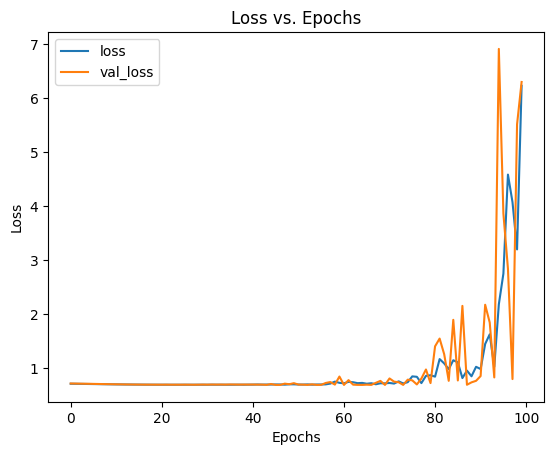

In [36]:
ml_toolbox.analysis.history.plot_history(model_4_history, 'loss')

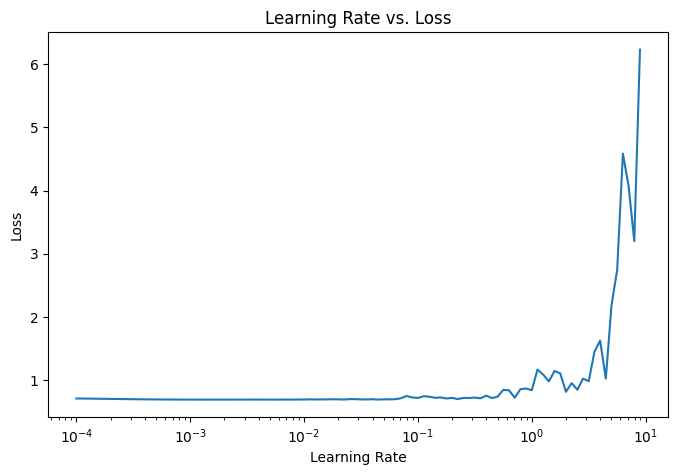

In [37]:
learning_rates = INITIAL_LEARNING_RATE_4 * (10 ** (tf.range(100) / 20))

ml_toolbox.analysis.history.plot_learning_rate_versus_loss(learning_rates, model_4_history.history['loss'], figsize=(8,5))

#### Finding Ideal Learning Rate from Above Graph
The ideal learning rate is between slightly before where the learning rate "flattens out", and the lowest point on the curve.

For the above example, the ideal learning rate is somewhere betwee, .01 and .1

### Experiment-5: Test Optimized Learning Rate

From Experiment-4, I am going to test the optimized learning rate value of .03 to See if that improves Experiment-3.

* Two Hidden Layers - 5 Neurons, 5 Neurons - Relu
* Optimizer - Adam, Learning Rate=0.03
* Epochs - 20 (100 doesn't add anything)

In [67]:
# Constants
EPOCHS_5 = 100
LEARNING_RATE_5 = 0.03

In [68]:
# Create Model
model_5 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(INPUT_SHAPE,)),
    tf.keras.layers.Dense(5, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(5, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(OUTPUT_SHAPE, activation=tf.keras.activations.sigmoid),
])

# Compile Model with the Ideal Learning Rate found in Plot Above (0.03)
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=LEARNING_RATE_5),
                metrics=['accuracy'])

# Fit Model
model_5_history = model_5.fit(X_train,
                              y_train,
                              epochs=EPOCHS_5,
                              validation_data=(X_test, y_test),
                              verbose=0)

2023-09-15 20:51:39.893364: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-15 20:51:40.183112: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


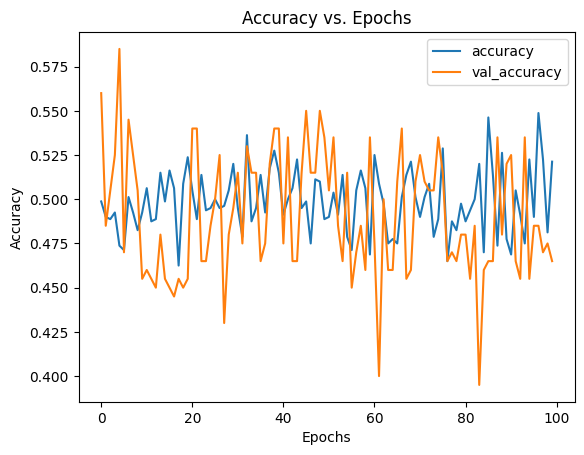

In [69]:
ml_toolbox.analysis.history.plot_history(model_5_history, 'accuracy')

In [70]:
model_5_pred_probs = model_5.predict(X_test)
model_5_preds = tf.round(model_5_pred_probs)

model_5_results = ml_toolbox.analysis.classification.generate_prediction_metrics(y_test,
                                                                                 tf.squeeze(model_5_preds))
model_5_results

7/7 [==============================] - 0s 3ms/step


2023-09-15 20:52:13.407594: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


ClassificationPredictionMetrics(accuracy=0.465, precision=0.47287499999999993, recall=0.465, f1=0.4602854560518189, name=None)

#### Findings

The epoch doesn't hit 99% accuracy for model_4 until ~13 epochs, where model_5 hits 99% accuracy at ~9 epochs.

313/313 [==============================] - 0s 1ms/step


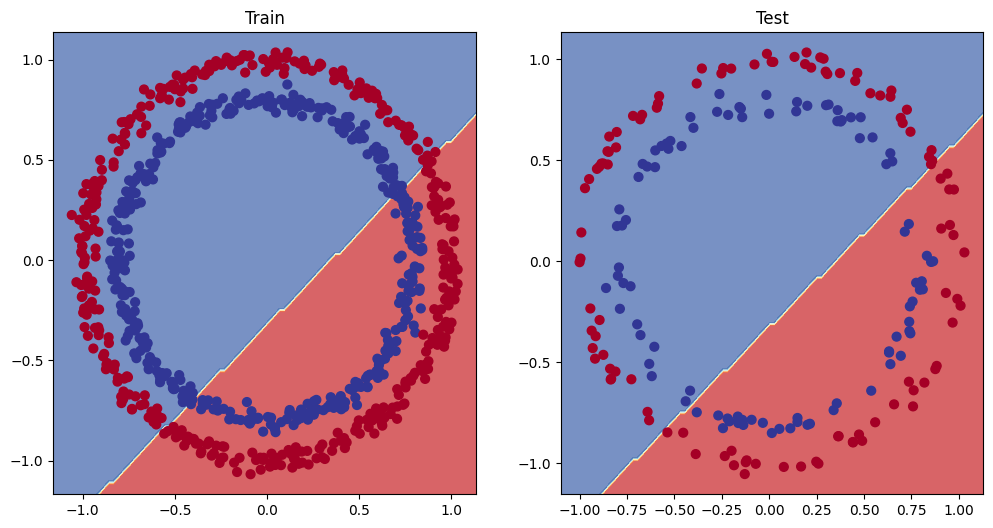

In [71]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_5, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_5, X_test, y_test)

## Analysis

After running through a handful of experiments, it is time to look at the performance of each model.

#### Note
Alongside visualizing model results as mush as possible, there are a handful of other classification evaluation methods & metrics to be familiar with:
* Accuracy - Most Common
* Precision - Less false positives
* Recall - Less false negatives
* F1-score
* Confusion Matrix
* SKLearn Classification Report

In [43]:
# All Results
all_results = [model_3_results, model_5_results]

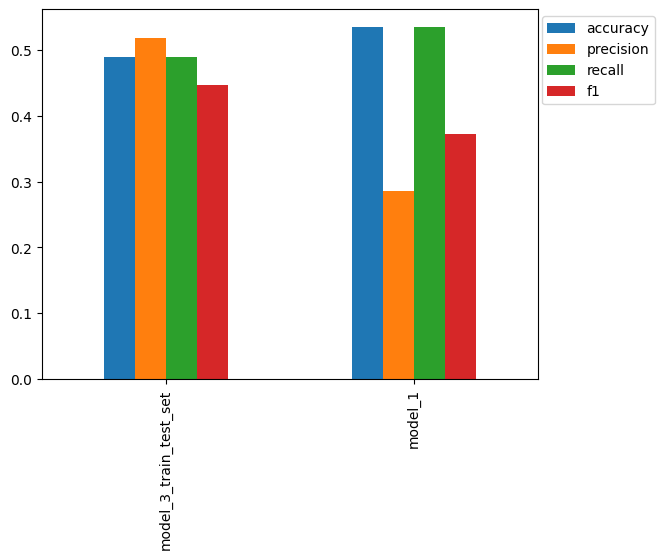

In [57]:
all_results_df = ml_toolbox.analysis.classification.generate_prediction_metrics_dataframe(all_results)

all_results_df.plot(kind='bar').legend(bbox_to_anchor=(1.25, 1.0), loc='upper right')

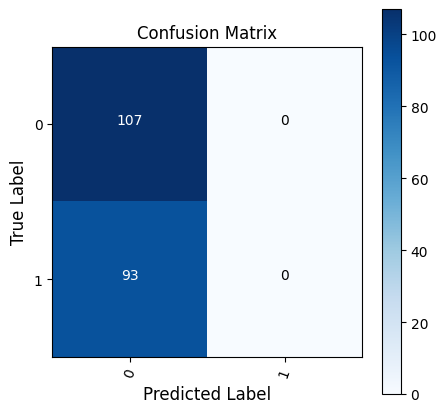

In [49]:
# Confusion Matrix of our Model
# Note: y pred comes out as a decimal for its estimates, so to get actual guess in binary form, need to round the prediction.
ml_toolbox.analysis.classification.plot_confusion_matrix(y_test, model_5_preds, figsize=(5,5), label_text_size=12)